In [4]:
import gzip
import os
import pickle
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt

# ResNet20 on CIFAR10

In [2]:
bs_list = [64, 128, 256, 512, 1024]
color_dict = {64: 'blue', 128: 'green', 256: 'orange', 512: 'red', 1024: 'purple'}

In [3]:
dict_varpro = {}
dict_varprom = {}
dict_sgd = {}
dict_sgdm = {}
dict_shampoo = {}

dir_path = ('./VarPro_resnet/results')

for bs in tqdm(bs_list):
    with gzip.open(os.path.join(dir_path, f'VarPro_lmbda-3.0_bs{bs}_ts-3.0.pkl.gz'), 'rb') as f:
        dict_varpro[bs] = pickle.load(f)

    with gzip.open(os.path.join(dir_path, f'VarProM_lmbda-3.0_bs{bs}_ts-3.0.pkl.gz'), 'rb') as f:
        dict_varprom[bs] = pickle.load(f)

    with gzip.open(os.path.join(dir_path, f'SGD_lmbda-3.0_bs{bs}_ts-3.0.pkl.gz'), 'rb') as f:
        dict_sgd[bs] = pickle.load(f)

    with gzip.open(os.path.join(dir_path, f'SGDM_lmbda-3.0_bs{bs}_ts-3.0.pkl.gz'), 'rb') as f:
        dict_sgdm[bs] = pickle.load(f)

    with gzip.open(os.path.join(dir_path, f'Shampoo_lmbda-3.0_bs{bs}_ts-2.0.pkl.gz'), 'rb') as f:
        dict_shampoo[bs] = pickle.load(f)
    


100%|██████████| 5/5 [00:21<00:00,  4.33s/it]


## Comparing different batch sizes

## Training loss

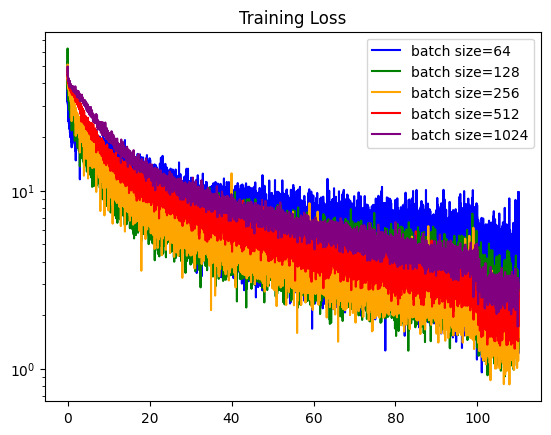

In [12]:
for bs in bs_list:
    loss_list = dict_varprom[bs]['loss_list']
    time = np.linspace(0, 110, len(loss_list))
    plt.plot(time, loss_list, label=f'batch size={bs}', color=color_dict[bs])
plt.legend()
plt.title('Training Loss')
plt.yscale('log')


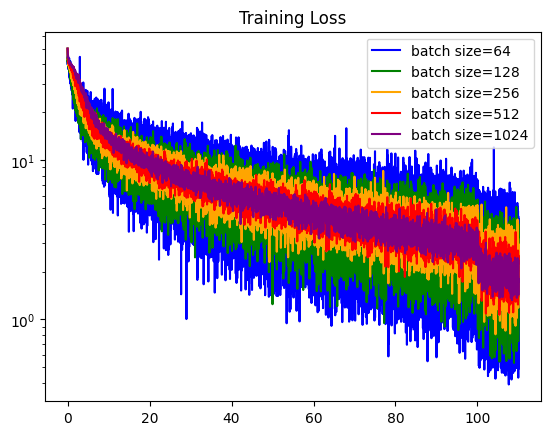

In [9]:
for bs in bs_list:
    loss_list = dict_sgdm[bs]['loss_list']
    time = np.linspace(0, 110, len(loss_list))
    plt.plot(time, loss_list, label=f'batch size={bs}', color=color_dict[bs])
plt.legend()
plt.title('Training Loss')
plt.yscale('log')

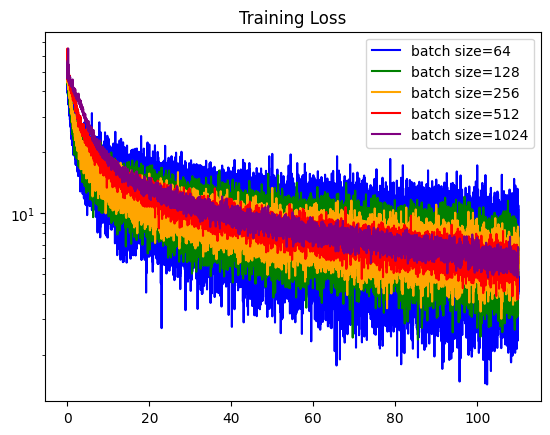

In [10]:
for bs in bs_list:
    loss_list = dict_shampoo[bs]['loss_list']
    time = np.linspace(0, 110, len(loss_list))
    plt.plot(time, loss_list, label=f'batch size={bs}', color=color_dict[bs])
plt.legend()
plt.title('Training Loss')
plt.yscale('log')


## Accuracy

Text(0.5, 1.0, 'VarProM accuracy')

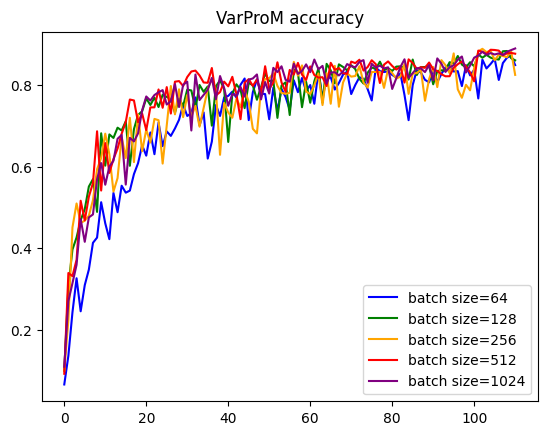

In [22]:
for bs in bs_list:
    plt.plot(dict_varprom[bs]['accuracy_list'], label=f'batch size={bs}', color=color_dict[bs])
plt.legend()
#plt.yscale('log')
plt.title('VarProM accuracy')

Text(0.5, 1.0, 'VarProM accuracy')

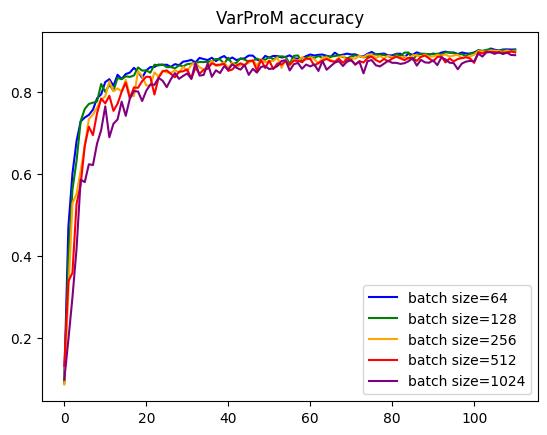

In [23]:
for bs in bs_list:
    plt.plot(dict_sgdm[bs]['accuracy_list'], label=f'batch size={bs}', color=color_dict[bs])
plt.legend()
#plt.yscale('log')
plt.title('VarProM accuracy')

Text(0.5, 1.0, 'Shampoo accuracy')

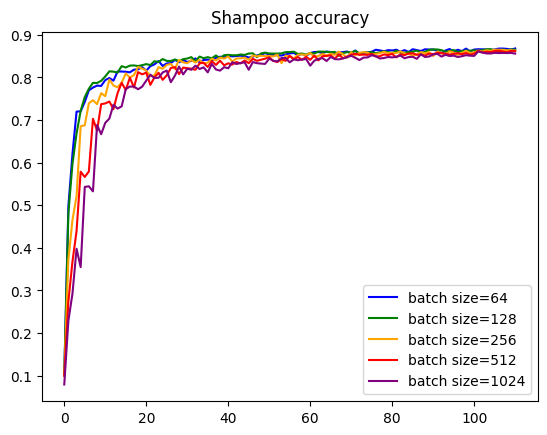

In [19]:
for bs in bs_list:
    plt.plot(dict_shampoo[bs]['accuracy_list'], label=f'batch size={bs}', color=color_dict[bs])
plt.legend()
#plt.yscale('log')
plt.title('Shampoo accuracy')

## Comparing different methods

Text(0.5, 1.0, 'Accuracy')

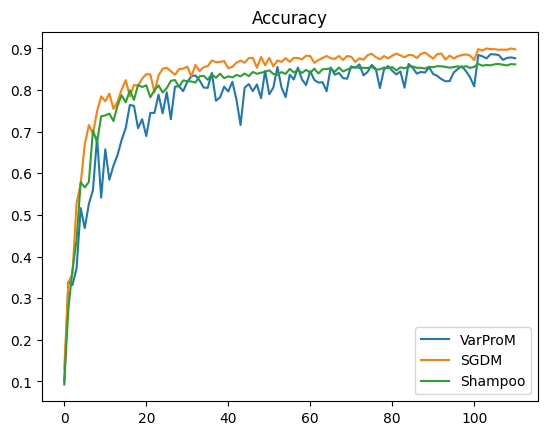

In [27]:
bs = 512

plt.plot(dict_varprom[bs]['accuracy_list'], label=f'VarProM')
#plt.plot(dict_2ts[bs]['accuracy_list'], label=f'batch size={bs}', color=color_dict[bs])
plt.plot(dict_sgdm[bs]['accuracy_list'], label=f'SGDM')
plt.plot(dict_shampoo[bs]['accuracy_list'], label=f'Shampoo')
plt.legend()
plt.title('Accuracy')
#plt.yscale('log')